# Data wrangling: weather files

## Auto-Evaluación

Se dan 6 archivos para dejar en un formato simple usando los conceptos de [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf) de Hadley Wickham.

La tarea principal es unir los 6 archivos de weather* , combinar las columnas de tal manera que se cree una única columna de fecha y otras columnas con las variables que se observan:



| date | maxT | meanT | minT | … |
| ------------ | ------ | ------| -----| ----- |
|2014-12-01 | 64 | 52|  39 |… |
|2014-12-02 | 42 | 38|  33 | … |

Las tareas secundarias son:
* graficar temperaturas (max, min y average/mean) vs date
* predecir la temperatura del siguiente día del último registro usando regresión lineal con los últimos 10 pasos.

Hint: se puede utilizar el [video](https://www.dataschool.io/python-pandas-tricks/) tutorial de [25 trucos en pandas](https://nbviewer.org/github/justmarkham/pandas-videos/blob/master/top_25_pandas_tricks.ipynb), la función [melt](https://towardsdatascience.com/wide-to-long-data-how-and-when-to-use-pandas-melt-stack-and-wide-to-long-7c1e0f462a98) y lo que sea necesario. [Aquí](https://youtu.be/tWFQqaRtSQA?si=nwIvFm_1RXzc81Q7) otro video tutorial con 21 trucos.

Pueden preguntarme dudas y también usar chatGPT

Entrega: sábado 20 de septiembre 2025, 10 am. Subir a github y compartir el repositorio en mensaje privado


# **SOLUCIÓN** | Angel Gonzalez Rodriguez

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Convert the ".txt" files on a DataFrame

df_1 = pd.read_csv("/content/weather01.txt", sep='\s+')
df_1
df_2 = pd.read_csv("/content/weather02.txt", sep='\s+')
df_2
df_3 = pd.read_csv("/content/weather03.txt", sep='\s+')
df_3
df_4 = pd.read_csv("/content/weather04.txt", sep='\s+')
df_4
df_5 = pd.read_csv("/content/weather05.txt", sep='\s+')
df_5
df_6 = pd.read_csv("/content/weather06.txt", sep='\s+')
df_6

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-520553120.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_1 = pd.read_csv("/content/weather01.txt", sep='\s+')
/tmp/ipython-input-520553120.py:5: SyntaxWarning: invalid escape sequence '\s'
  df_2 = pd.read_csv("/content/weather02.txt", sep='\s+')
/tmp/ipython-input-520553120.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_3 = pd.read_csv("/content/weather03.tx

,X28,X29,X30,X31
1,52,41,30,30.0
2,46,36,26,25.0
3,40,30,22,20.0
4,42,26,10,8.0
5,35,20,4,5.0
...,...,...,...,...
282,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN
285,NaN,NaN,NaN,NaN


In [3]:
# Concatenate the Data Frames

df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], axis=1)
df

,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52.0,52,41,30,30.0
2,2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45.0,46,36,26,25.0
3,3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38.0,40,30,22,20.0
4,4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34.0,42,26,10,8.0
5,5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31.0,35,20,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,2015,12,Max.Gust.SpeedMPH,17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,283,2015,12,PrecipitationIn,0.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,284,2015,12,CloudCover,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,285,2015,12,Events,Rain,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Delete the "X" Column

df = df.drop('X', axis=1)
df

,year,month,measure,X1,X2,X3,X4,X5,X6,X7,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,38,...,44,47,46,59,50,52.0,52,41,30,30.0
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,30,...,39,45,44,52,44,45.0,46,36,26,25.0
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,21,...,33,42,41,44,37,38.0,40,30,22,20.0
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,36,...,39,45,46,58,31,34.0,42,26,10,8.0
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,20,...,34,42,44,43,29,31.0,35,20,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2015,12,Max.Gust.SpeedMPH,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,2015,12,PrecipitationIn,0.14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2015,12,CloudCover,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2015,12,Events,Rain,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Convert the columns into rows

df = pd.melt(df, id_vars=['year','month','measure'], var_name='variable', value_name='value')
df

,year,month,measure,variable,value
0,2014,12,Max.TemperatureF,X1,64
1,2014,12,Mean.TemperatureF,X1,52
2,2014,12,Min.TemperatureF,X1,39
3,2014,12,Max.Dew.PointF,X1,46
4,2014,12,MeanDew.PointF,X1,40
...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,X31,NaN
8862,2015,12,PrecipitationIn,X31,NaN
8863,2015,12,CloudCover,X31,NaN
8864,2015,12,Events,X31,NaN


In [6]:
# Replace the values from variable column

df['variable'] = df['variable'].replace({'X1': 1, 'X2': 2, 'X3': 3, 'X4': 4, 'X5': 5, 'X6': 6, 'X7': 7, 'X8': 8, 'X9': 9, 'X10': 10, 'X11': 11, 'X12': 12, 'X13': 13, 'X14': 14, 'X15': 15, 'X16': 16, 'X17': 17, 'X18': 18, 'X19': 19, 'X20': 20, 'X21': 21, 'X22': 22, 'X23': 23, 'X24': 24, 'X25': 25, 'X26': 26, 'X27': 27, 'X28': 28, 'X29': 29, 'X30': 30, 'X31': 31})
df

/tmp/ipython-input-2334258883.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variable'] = df['variable'].replace({'X1': 1, 'X2': 2, 'X3': 3, 'X4': 4, 'X5': 5, 'X6': 6, 'X7': 7, 'X8': 8, 'X9': 9, 'X10': 10, 'X11': 11, 'X12': 12, 'X13': 13, 'X14': 14, 'X15': 15, 'X16': 16, 'X17': 17, 'X18': 18, 'X19': 19, 'X20': 20, 'X21': 21, 'X22': 22, 'X23': 23, 'X24': 24, 'X25': 25, 'X26': 26, 'X27': 27, 'X28': 28, 'X29': 29, 'X30': 30, 'X31': 31})


,year,month,measure,variable,value
0,2014,12,Max.TemperatureF,1,64
1,2014,12,Mean.TemperatureF,1,52
2,2014,12,Min.TemperatureF,1,39
3,2014,12,Max.Dew.PointF,1,46
4,2014,12,MeanDew.PointF,1,40
...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,31,NaN
8862,2015,12,PrecipitationIn,31,NaN
8863,2015,12,CloudCover,31,NaN
8864,2015,12,Events,31,NaN


In [7]:
# Rename the variable column

df = df.rename(columns={'variable': 'day'})
df

,year,month,measure,day,value
0,2014,12,Max.TemperatureF,1,64
1,2014,12,Mean.TemperatureF,1,52
2,2014,12,Min.TemperatureF,1,39
3,2014,12,Max.Dew.PointF,1,46
4,2014,12,MeanDew.PointF,1,40
...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,31,NaN
8862,2015,12,PrecipitationIn,31,NaN
8863,2015,12,CloudCover,31,NaN
8864,2015,12,Events,31,NaN


In [8]:
# Create a new data column

df['date'] = pd.to_datetime(df[["year", "month", "day"]], errors="coerce")
df

,year,month,measure,day,value,date
0,2014,12,Max.TemperatureF,1,64,2014-12-01
1,2014,12,Mean.TemperatureF,1,52,2014-12-01
2,2014,12,Min.TemperatureF,1,39,2014-12-01
3,2014,12,Max.Dew.PointF,1,46,2014-12-01
4,2014,12,MeanDew.PointF,1,40,2014-12-01
...,...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,31,NaN,2015-12-31
8862,2015,12,PrecipitationIn,31,NaN,2015-12-31
8863,2015,12,CloudCover,31,NaN,2015-12-31
8864,2015,12,Events,31,NaN,2015-12-31


In [9]:
# Delete the individual date value columns

df.drop(["year", "month", "day"], axis=1, inplace=True)
df

,measure,value,date
0,Max.TemperatureF,64,2014-12-01
1,Mean.TemperatureF,52,2014-12-01
2,Min.TemperatureF,39,2014-12-01
3,Max.Dew.PointF,46,2014-12-01
4,MeanDew.PointF,40,2014-12-01
...,...,...,...
8861,Max.Gust.SpeedMPH,NaN,2015-12-31
8862,PrecipitationIn,NaN,2015-12-31
8863,CloudCover,NaN,2015-12-31
8864,Events,NaN,2015-12-31


In [10]:
# Reshape the DataFrame

df = df.pivot_table(index="date", columns='measure', values='value', aggfunc='sum').reset_index()
df

measure,date,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
0,2014-12-01,6,Rain,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
1,2014-12-02,7,Rain-Snow,40,29,92,30.71,42,10,24,...,8,15,27,17,51,30.4,33,2,0.10,62
2,2014-12-03,8,Rain,49,38,100,30.4,51,10,29,...,5,12,42,24,57,29.87,37,1,0.44,254
3,2014-12-04,3,Rain,24,33,69,30.56,43,10,25,...,10,12,21,13,39,30.09,30,10,0.00,292
4,2014-12-05,5,Rain,37,26,85,30.68,42,10,22,...,10,10,25,12,47,30.45,26,5,0.11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2015-12-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392,2015-12-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393,2015-12-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,2015-12-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Delete the unnecessary columns

df.drop(['CloudCover', 'Events', 'Max.Dew.PointF', 'Max.Gust.SpeedMPH',
       'Max.Humidity', 'Max.Sea.Level.PressureIn','Max.VisibilityMiles',
       'Max.Wind.SpeedMPH', 'Mean.Humidity', 'Mean.Sea.Level.PressureIn',
       'Mean.VisibilityMiles', 'Mean.Wind.SpeedMPH', 'MeanDew.PointF',
       'Min.DewpointF', 'Min.Humidity', 'Min.Sea.Level.PressureIn',
       'Min.VisibilityMiles', 'PrecipitationIn', 'WindDirDegrees'], axis=1, inplace=True)
df

measure,date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF
0,2014-12-01,64,52,39
1,2014-12-02,42,38,33
2,2014-12-03,51,44,37
3,2014-12-04,43,37,30
4,2014-12-05,42,34,26
...,...,...,...,...
391,2015-12-27,0,0,0
392,2015-12-28,0,0,0
393,2015-12-29,0,0,0
394,2015-12-30,0,0,0


In [12]:
# Delete the rows with Zero or NaN Values

df = df[~((df == 0) | (df.isna())).any(axis=1)]
df

measure,date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF
0,2014-12-01,64,52,39
1,2014-12-02,42,38,33
2,2014-12-03,51,44,37
3,2014-12-04,43,37,30
4,2014-12-05,42,34,26
...,...,...,...,...
361,2015-11-27,64.0,56.0,48.0
362,2015-11-28,60,51,41
363,2015-11-29,44,38,32
364,2015-11-30,38,33,28


In [13]:
# Convert all values into string values

df = df.astype(str)
df

measure,date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF
0,2014-12-01,64,52,39
1,2014-12-02,42,38,33
2,2014-12-03,51,44,37
3,2014-12-04,43,37,30
4,2014-12-05,42,34,26
...,...,...,...,...
361,2015-11-27,64.0,56.0,48.0
362,2015-11-28,60,51,41
363,2015-11-29,44,38,32
364,2015-11-30,38,33,28


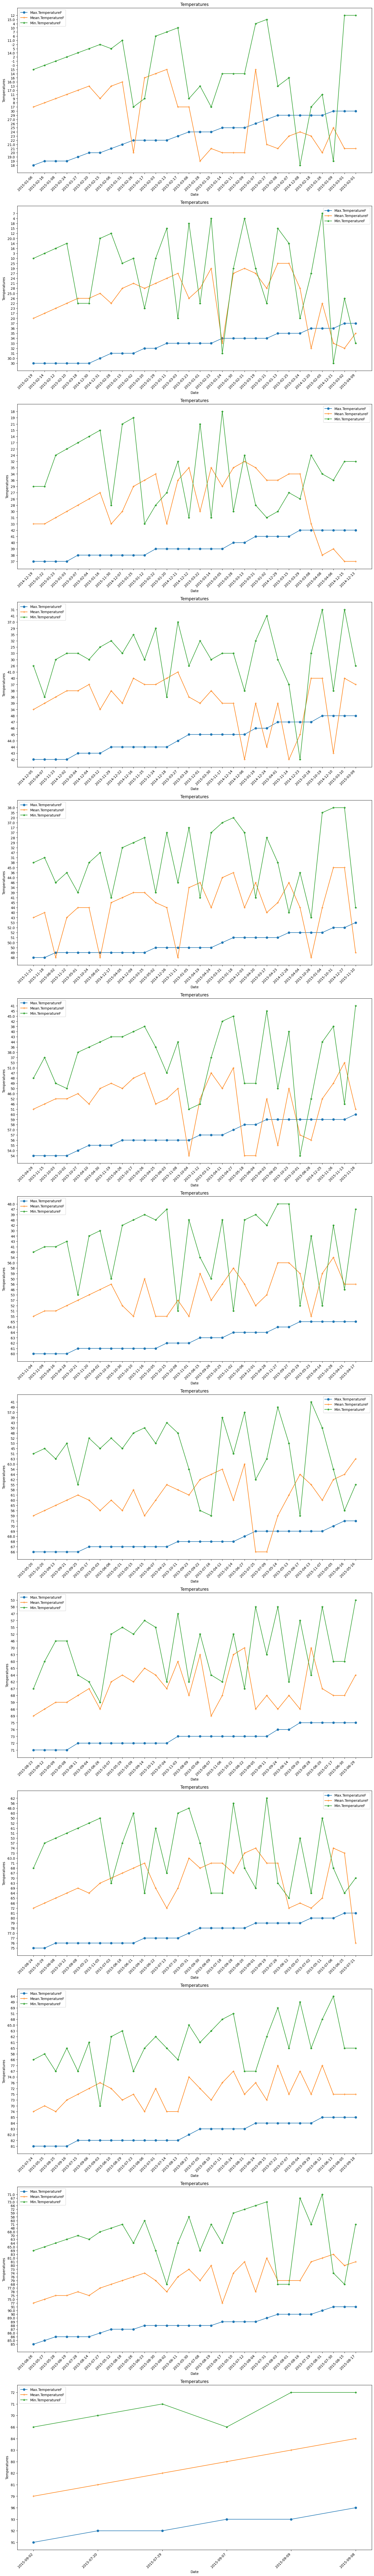

In [14]:
# Create the graphics

df = df.sort_values(by='Max.TemperatureF')

# Total data by subgraph
graphics = 30

# Divide the DataFrame
block = [df.iloc[i:i+graphics] for i in range(0, len(df), graphics)]

# Create the subgraph, one for block
fig, axes = plt.subplots(len(block), 1, figsize=(15, 8 * len(block)), constrained_layout=True)

if len(block) == 1:
    axes = [axes]

# Graph every block
for ax, bloque in zip(axes, block):
    ax.plot(bloque['date'], bloque['Max.TemperatureF'], marker='o', label='Max.TemperatureF')
    ax.plot(bloque['date'], bloque['Mean.TemperatureF'], marker='+', label='Mean.TemperatureF')
    ax.plot(bloque['date'], bloque['Min.TemperatureF'], marker='*', label='Min.TemperatureF')

    ax.set_xlabel('Date')
    ax.set_ylabel('Temperatures')
    ax.set_title('Temperatures')
    ax.legend()

    # Rotate the dates
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [15]:
# Import the libraries

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df['Max.TemperatureF_target'] = df['Max.TemperatureF'].shift(-1)
df['Mean.TemperatureF_target'] = df['Mean.TemperatureF'].shift(-1)
df['Min.TemperatureF_target'] = df['Min.TemperatureF'].shift(-1)

df = df.dropna()
df

measure,date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.TemperatureF_target,Mean.TemperatureF_target,Min.TemperatureF_target
36,2015-01-06,18,17,15,19,8,-3
77,2015-02-16,19,8,-3,19,9,-1
38,2015-01-08,19,9,-1,19,11,2
85,2015-02-24,19,11,2,19.0,17.0,14.0
57,2015-01-27,19.0,17.0,14.0,20,13,5
...,...,...,...,...,...,...,...
259,2015-08-17,91,81,71,91,79,66
275,2015-09-02,91,79,66,92,81,70
231,2015-07-20,92,81,70,92,82,71
240,2015-07-29,92,82,71,93,80,66


In [18]:
# Today dates
X = df[['Max.TemperatureF', 'Mean.TemperatureF', 'Min.TemperatureF']]

# Next Day dates
y = df[['Max.TemperatureF_target', 'Mean.TemperatureF_target', 'Min.TemperatureF_target']]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 19.118863764486925
R2 Score: 0.9547614694146961


In [28]:
# Last Temperatures
today = [[93, 80, 66]]  # max, mean, min

prediccion = model.predict(today)
print(f"Next Day prediction:")
print(f" - Max Temp: {prediccion[0][0]:.2f}°C")
print(f" - Mean Temp: {prediccion[0][1]:.2f}°C")
print(f" - Min Temp: {prediccion[0][2]:.2f}°C")

Next Day prediction:
 - Max Temp: 93.08°C
 - Mean Temp: 83.67°C
 - Min Temp: 73.67°C


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
